# Proven Q1 (iii)

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [95]:
def kmeans(X,k,plot=False,T=1000):
    """
    k-means Clustering

    Args:
        X: [n x m] array of data, each row is a datapoint
        k: Number of clusters
        plot: Whether to plot final clustering
        T: Max number of iterations
        
    Returns:
        Numpy array of labels obtained by k-means clustering
    
    NOTE:
        z: labels
    """
    global error

    # Number of data points
    n = X.shape[0]

    # Initialization
    dist = np.zeros((k,n))
    z = np.zeros((n,))
    means = X[np.random.choice(n,size=k,replace=False),:] # Random initialization of cluster means
  

    # Main iteration for kmeans
    converged = 1
    i=0
    while i < T and converged > 0:
        # Update labels 
        old_labels = z.copy()
        for j in range(k):
            dist[j,:] = np.sum((X - means[j,:])**2,axis=1) # L2 Norm
        z = np.argmin(dist,axis=0)
        error.append(z)

        # Check for Convergence
        converged = np.sum(z != old_labels)

        # Update means 
        for j in range(k):
            means[j,:] = np.mean(X[z==j,:],axis=0)

        # Iterate counter
        i+=1

    print("Number of iterations: ", i)
    # error.append(z)
    # error = dist
    
    return z


In [96]:
data = np.genfromtxt('./A2Q1.csv', delimiter=',')

In [103]:
error = []
X = data
K = 4
kmeans_labels = kmeans(X,K,plot=True)
print("Labels Shape: ", kmeans_labels.shape)
print("Shape of Error: ", np.array(error).shape)
error_avg = np.sum(np.array(error), axis=1) / np.array(error).shape[1]
print(error_avg.shape)

Number of iterations:  17
Labels Shape:  (400,)
Shape of Error:  (17, 400)
(17,)


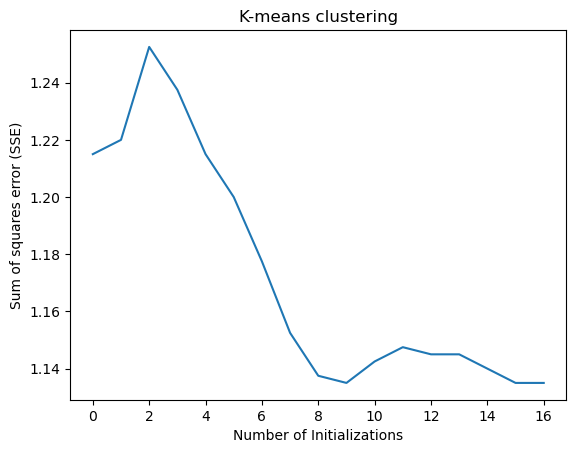

In [104]:
# print(error)
plt.title('K-means clustering')
plt.xlabel('Number of Initializations')
plt.ylabel('Sum of squares error (SSE)')
plt.plot(error_avg)
# plt.savefig("plots/plot-KMeansObjective1.png")
plt.show()